<h3>Se abre el archivo que se empleará en esta exploración, se crea una nueva columna para que las comparaciones partan siempre a partir de 0, ya que la columna Polarity está en el rango de -1 a 1.<BR>De esta manera, se preserva que los valores positivos y negativos estén en la escala prevista en un inicio.
</h3>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, json, numpy as np, pandas as pd

ruta = 'C://TweetsPositivosMuertes.csv'
df = pd.read_csv(ruta, header=0)
df['SentScore'] = df['Polarity'] + 1
df.head()

,Fecha,Polarity,Positivos,Muertes,SentScore
0,2020-02-28,-0.361114,1,0,0.638886
1,2020-02-29,-0.204301,1,0,0.795699
2,2020-03-01,-0.200173,0,0,0.799827
3,2020-03-02,-0.179771,2,0,0.820229
4,2020-03-03,-0.153471,3,0,0.846529


<h3>Se presenta una primera visualización directa del  Sentiment Score vs las infecciones diarias
<BR>Rango 28/02/2020 - 28/02/2022</h3>

Text(0, 0.5, 'Nuevas infecciones diarias')

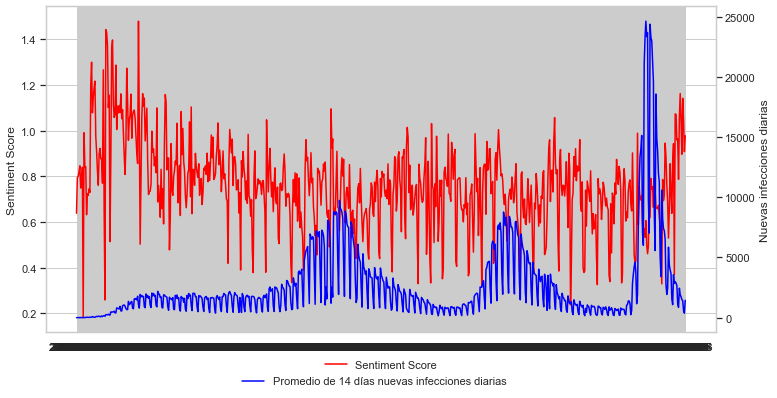

In [5]:
fig,ax = plt.subplots(figsize=(12,6))

ax.plot(df.Fecha,df['SentScore'],color='red',label='Sentiment Score')
sns.set()
sns.set_style("whitegrid")
ax.set_ylabel('Sentiment Score')

ax2=ax.twinx()
ax2.plot(df.Fecha, df["Positivos"], color="blue",label='Promedio de 14 días nuevas infecciones diarias')
leg = ax.legend(loc='center', frameon=False,bbox_to_anchor=(0.5, -0.10))
leg2=ax2.legend(loc='center', frameon=False,bbox_to_anchor=(0.49, -0.15))
ax2.grid(False)
ax2.set_ylabel('Nuevas infecciones diarias')

<h3>Se presenta una visualización directa del Sentiment Score vs las defunciones diarias
<BR>Rango 28/02/2020 - 28/02/2022</h3>

Text(0, 0.5, 'Nuevas muertes diarias')

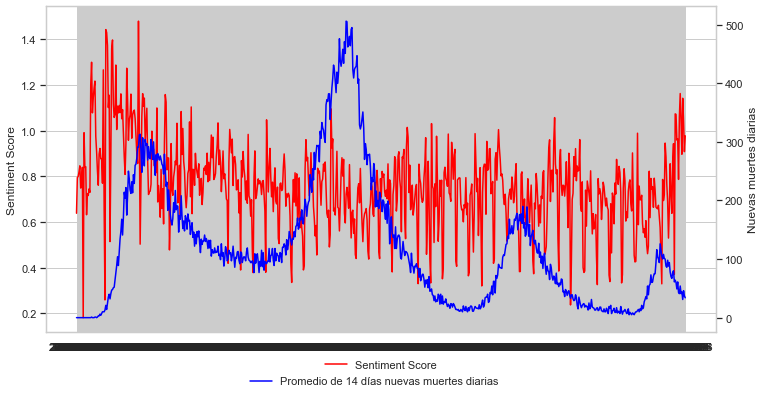

In [6]:
fig,ax = plt.subplots(figsize=(12,6))

ax.plot(df.Fecha,df['SentScore'],color='red',label='Sentiment Score')
sns.set()
sns.set_style("whitegrid")
ax.set_ylabel('Sentiment Score')

ax2=ax.twinx()
ax2.plot(df.Fecha, df["Muertes"], color="blue",label='Promedio de 14 días nuevas muertes diarias')
leg = ax.legend(loc='center', frameon=False,bbox_to_anchor=(0.5, -0.10))
leg2=ax2.legend(loc='center', frameon=False,bbox_to_anchor=(0.49, -0.15))
ax2.grid(False)
ax2.set_ylabel('Nuevas muertes diarias')

<h3>En este paso se preparan variables para tener un retraso de 14 días y comparar el efecto futuro del Sentiment Score vs los casos presentados</h3>

In [14]:
lag = 14
df["Positivos2"] = df["Positivos"].shift(lag)
df["Muertes2"] = df["Muertes"].shift(lag)
df["Positivos2"] = df["Positivos2"].fillna(0)
df["Positivos2"] = df["Positivos2"].astype('int64')
df["Muertes2"] = df["Muertes2"].fillna(0)
df["Muertes2"] = df["Muertes2"].astype('int64')

<h3>Visualización del Sentiment Score vs las infecciones diarias con un retraso de 14 días
<BR>Rango 28/02/2020 - 28/02/2022</h3>

Text(0, 0.5, 'Nuevas infecciones diarias [Lag 14]')

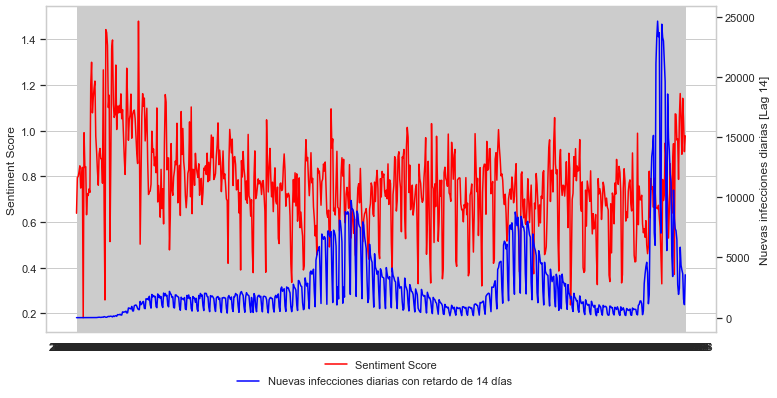

In [15]:
fig,ax = plt.subplots(figsize=(12,6))

ax.plot(df.Fecha,df['SentScore'],color='red',label='Sentiment Score')
sns.set()
sns.set_style("whitegrid")
ax.set_ylabel('Sentiment Score')

ax2=ax.twinx()
ax2.plot(df.Fecha, df["Positivos2"], color="blue",label='Nuevas infecciones diarias con retardo de 14 días')
leg = ax.legend(loc='center', frameon=False,bbox_to_anchor=(0.5, -0.10))
leg2=ax2.legend(loc='center', frameon=False,bbox_to_anchor=(0.49, -0.15))
ax2.grid(False)
ax2.set_ylabel('Nuevas infecciones diarias [Lag 14]')

<h3>Visualización del Sentiment Score vs las defunciones diarias con un retraso de 14 días
<BR>Rango 28/02/2020 - 28/02/2022</h3>

Text(0, 0.5, 'Nuevas defunciones diarias [Lag 14]')

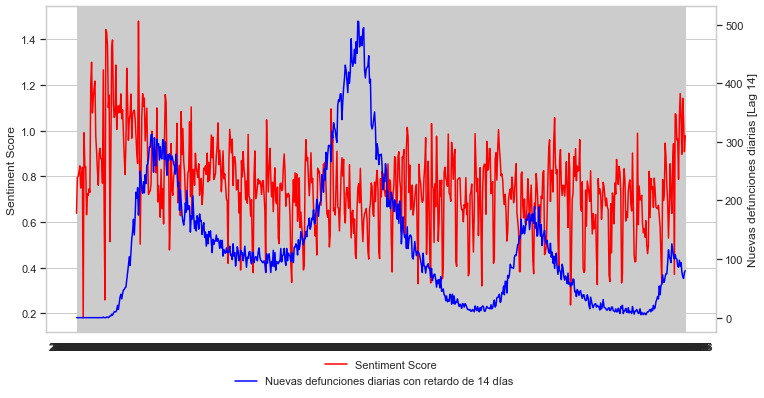

In [16]:
fig,ax = plt.subplots(figsize=(12,6))

ax.plot(df.Fecha,df['SentScore'],color='red',label='Sentiment Score')
sns.set()
sns.set_style("whitegrid")
ax.set_ylabel('Sentiment Score')

ax2=ax.twinx()
ax2.plot(df.Fecha, df["Muertes2"], color="blue",label='Nuevas defunciones diarias con retardo de 14 días')
leg = ax.legend(loc='center', frameon=False,bbox_to_anchor=(0.5, -0.10))
leg2=ax2.legend(loc='center', frameon=False,bbox_to_anchor=(0.49, -0.15))
ax2.grid(False)
ax2.set_ylabel('Nuevas defunciones diarias [Lag 14]')

In [19]:
#Se toma un subconjunto de los datos, para reflejar mejor la escala de la serie histórica
df2 = df.iloc[0:180]
df2.tail()

,Fecha,Polarity,Positivos,Muertes,SentScore,Positivos2,Muertes2
175,2020-08-25,-0.088102,1743,111,0.911898,1633,105
176,2020-08-26,-0.210022,2008,88,0.789978,1680,116
177,2020-08-27,-0.188242,1913,101,0.811758,1637,111
178,2020-08-28,-0.236307,1891,121,0.763693,1618,110
179,2020-08-29,-0.298670,986,114,0.701330,770,119


<h3>Visualización del Sentiment Score vs las infecciones diarias con un retraso de 14 días
<br>Rango 28/02/2020 - 29/08/2020</h3>

Text(0, 0.5, 'Nuevas infecciones diarias [Lag 14]')

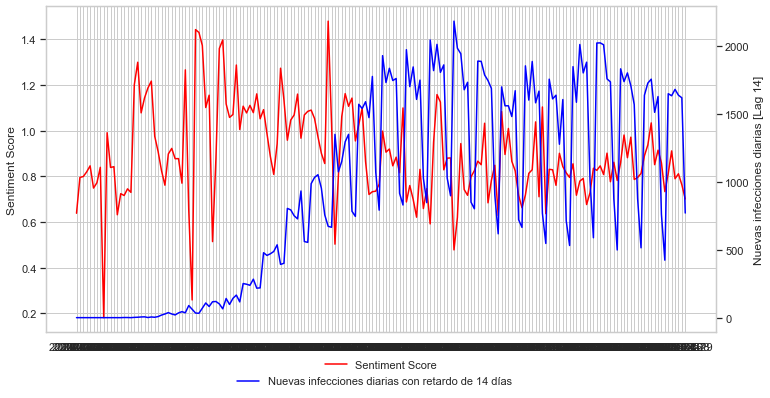

In [21]:
fig,ax = plt.subplots(figsize=(12,6))

ax.plot(df2.Fecha,df2['SentScore'],color='red',label='Sentiment Score')
sns.set()
sns.set_style("whitegrid")
ax.set_ylabel('Sentiment Score')

ax2=ax.twinx()
ax2.plot(df2.Fecha, df2["Positivos2"], color="blue",label='Nuevas infecciones diarias con retardo de 14 días')
leg = ax.legend(loc='center', frameon=False,bbox_to_anchor=(0.5, -0.10))
leg2=ax2.legend(loc='center', frameon=False,bbox_to_anchor=(0.49, -0.15))
ax2.grid(False)
ax2.set_ylabel('Nuevas infecciones diarias [Lag 14]')

<h3>Visualización del Sentiment Score vs las infecciones diarias con un retraso de 14 días
<BR>En este gráfico se ha invertido la serie del Sentiment Score para analizar mejor la relación causa-efecto
<BR>Rango 28/02/2020 - 29/08/2020</h3>

<ipython-input-34-7925e0f9257a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PolarityRev'] = df2['Polarity'] * -1


Text(0, 0.5, 'Nuevas infecciones diarias [Lag 14]')

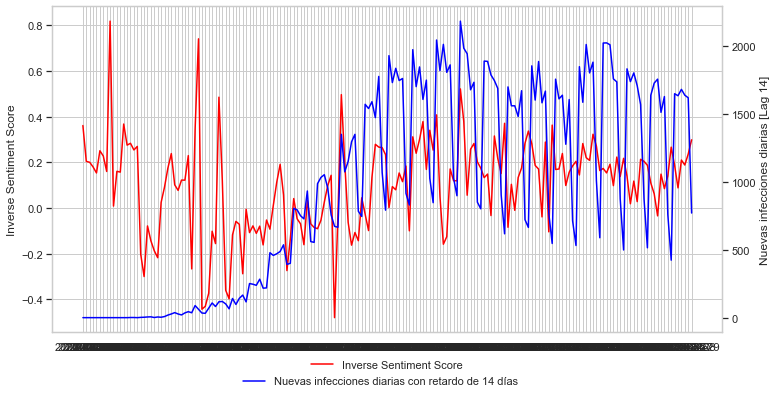

In [34]:
df2['PolarityRev'] = df2['Polarity'] * -1
fig,ax = plt.subplots(figsize=(12,6))

ax.plot(df2.Fecha,df2['PolarityRev'],color='red',label='Inverse Sentiment Score')
sns.set()
sns.set_style("whitegrid")
ax.set_ylabel('Inverse Sentiment Score')

ax2=ax.twinx()
ax2.plot(df2.Fecha, df2["Positivos2"], color="blue",label='Nuevas infecciones diarias con retardo de 14 días')
leg = ax.legend(loc='center', frameon=False,bbox_to_anchor=(0.5, -0.10))
leg2=ax2.legend(loc='center', frameon=False,bbox_to_anchor=(0.49, -0.15))
ax2.grid(False)
ax2.set_ylabel('Nuevas infecciones diarias [Lag 14]')

<h3>Visualización del Sentiment Score vs las defunciones diarias con un retraso de 14 días
<br>Rango 01/08/2020 - 27/12/2020</h3>

Text(0, 0.5, 'Nuevas infecciones diarias [Lag 14]')

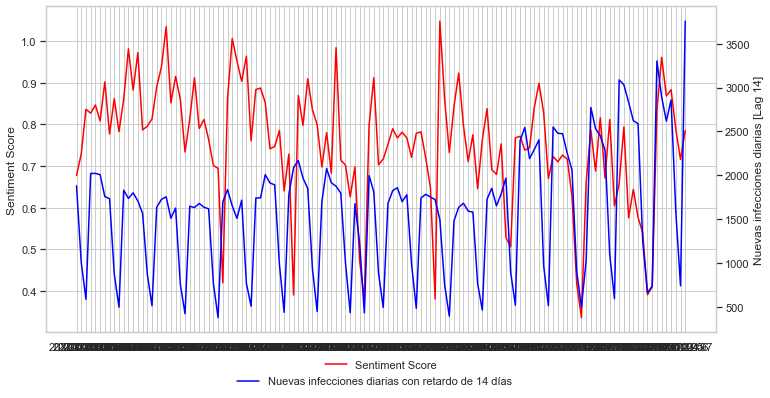

In [25]:
df3 = df.iloc[150:280]
fig,ax = plt.subplots(figsize=(12,6))

ax.plot(df3.Fecha,df3['SentScore'],color='red',label='Sentiment Score')
sns.set()
sns.set_style("whitegrid")
ax.set_ylabel('Sentiment Score')

ax2=ax.twinx()
ax2.plot(df3.Fecha, df3["Positivos2"], color="blue",label='Nuevas infecciones diarias con retardo de 14 días')
plt.xticks(rotation=90)
leg = ax.legend(loc='center', frameon=False,bbox_to_anchor=(0.5, -0.10))
leg2=ax2.legend(loc='center', frameon=False,bbox_to_anchor=(0.49, -0.15))
ax2.grid(False)
ax2.set_ylabel('Nuevas infecciones diarias [Lag 14]')